# Central Limit Theorem

In [13]:
import numpy as np, seaborn as sb, matplotlib.pyplot as plt,scipy.stats as stats
plt.rcParams['figure.figsize'] = [10,6]

## 1. Central Limit Theorem and its assumptions

CLT assumes that the variance of random varaibles $X_1, X_2, \ldots, X_n$ is finite.

### 1.1 Uniform distribution $U_i \sim \cal{U} (0,1)$

$$Z = \frac{\sum_{i=1}^{N}U_i-N \cdot \mathbb{E}U_1}{\sqrt{N\cdot \mathrm{Var}{U_1}}}$$

In [14]:
n=12
Z= np.array([(sum(np.random.random(n))-n*0.5)/(np.sqrt(n)*np.sqrt(1/12)) for _ in range(10**3)])

Text(0.5, 0.98, 'Comparison to $\\cal{N}(0,1)$')

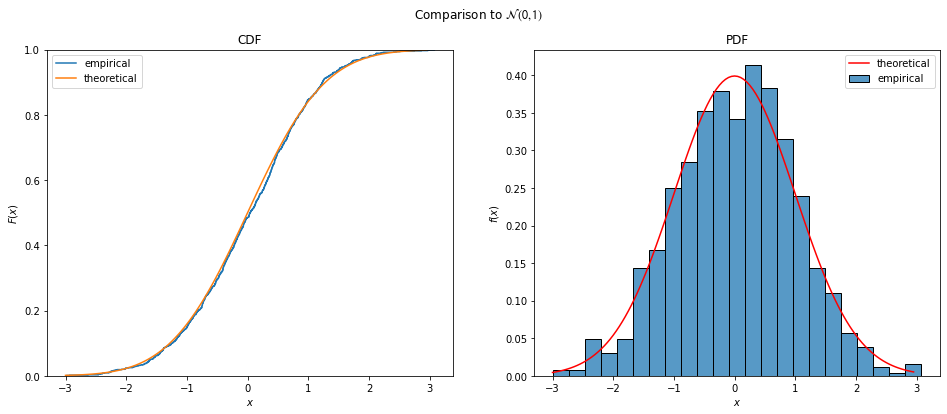

In [15]:
plt.figure(figsize=(16,6))
plt.subplot(121)
T = np.arange(-3,3,0.05)
sb.ecdfplot(Z,label="empirical")
plt.plot(T, stats.norm.cdf(T),label="theoretical")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.title("CDF")

sb.histplot(Z, stat="density",label="empirical",ax=plt.subplot(122))
plt.plot(T, stats.norm.pdf(T),'r',label="theoretical")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("PDF")
plt.suptitle("Comparison to $\cal{N}(0,1)$")

In [16]:
def ecf(X,T):
    return np.array([1/len(X)*np.sum(np.exp(X*1j*t)) for t in T])
def norm_cf(T):
    return np.array([np.exp(-t**2/2) for t in T])

Text(0.5, 0.98, 'Comparison of CF')

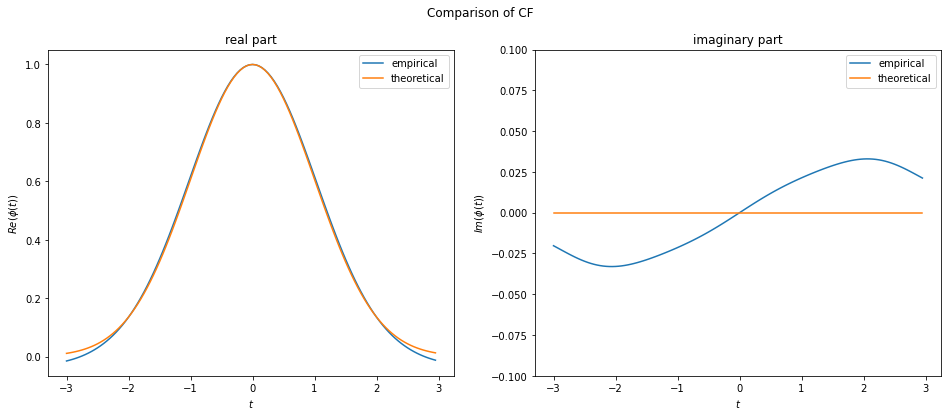

In [17]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(T,np.real(ecf(Z,T)),label="empirical")
plt.plot(T,np.real(norm_cf(T)),label="theoretical")
plt.title("real part")
plt.xlabel("$t$")
plt.ylabel("$Re(\phi(t))$")
plt.legend()

plt.subplot(122)
plt.plot(T,np.imag(ecf(Z,T)),label="empirical")
plt.plot(T,np.imag(norm_cf(T)),label="theoretical")
plt.title("imaginary part")
plt.xlabel("$t$")
plt.ylabel("$Im(\phi(t))$")
plt.ylim((-0.1,0.1))
plt.legend()

plt.suptitle("Comparison of CF")

CDF, PDF, and characteristic function for $Z$ are close to standard normal distribution. CLT holds for $X_n \sim \cal{U}(0,1)$ .

### 1.2 Exponential distribution $E \sim \cal{Exp}(1)$ for different values of $N$.

$$Z = \frac{\sum_{i=1}^{N}E_i-N \cdot \mathbb{E}E_1}{\sqrt{N\cdot \mathrm{Var}{E_1}}}$$

In [18]:
N=[5,12,50,1000]
lam=2
Z3= np.array([np.array([(sum(np.random.exponential(1/lam,n))-n*1/lam)/(np.sqrt(n)*np.sqrt(1/lam**2)) for _ in range(10**3)]) for n in N])

Text(0.5, 0.98, 'Comparison to $\\cal{N}(0,1)$ for different values of$N$')

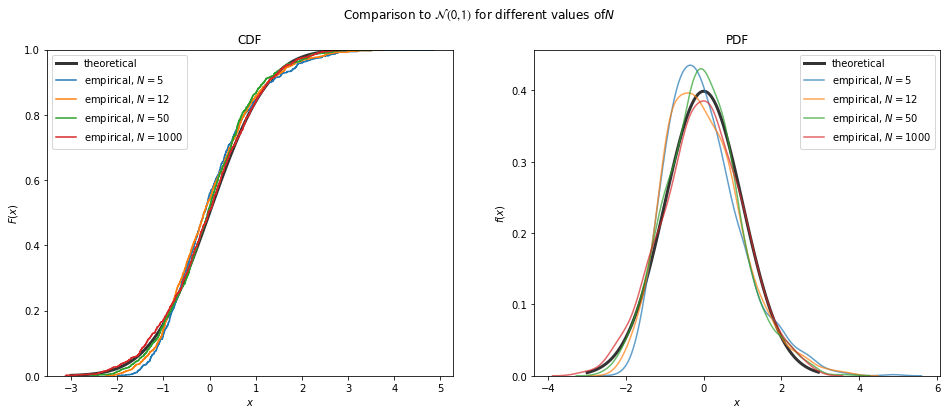

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(T, stats.norm.cdf(T),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    sb.ecdfplot(Z3[i],label=f"empirical, $N={N[i]}$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.title("CDF")

plt.subplot(122)
plt.plot(T, stats.norm.pdf(T),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    sb.kdeplot(Z3[i],label=f"empirical, $N={N[i]}$",alpha=0.7)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("PDF")

plt.suptitle(r"Comparison to $\cal{N}(0,1)$ for different values of$N$")

Text(0.5, 0.98, 'Comparison to CF for different values of $N$')

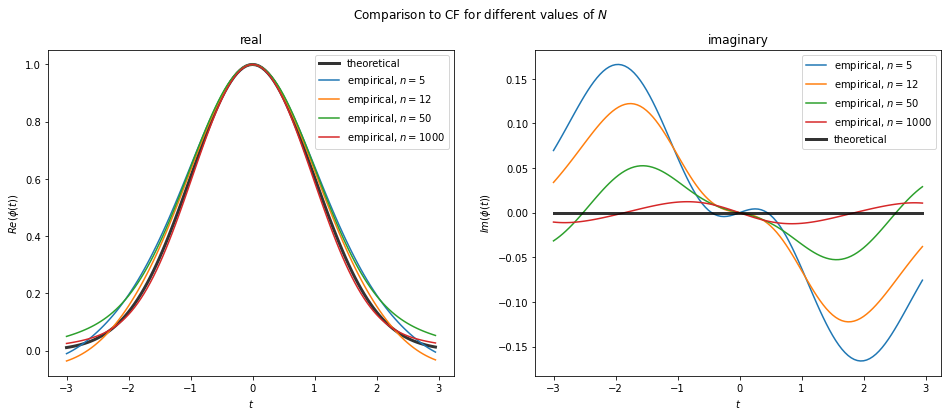

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(T, np.real(norm_cf(T)),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    plt.plot(T,np.real(ecf(Z3[i],T)),label=f"empirical, $n={N[i]}$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$Re(\phi(t))$")
plt.title("real")

plt.subplot(122)
for i in range(len(N)):
    plt.plot(T,np.imag(ecf(Z3[i],T)),label=f"empirical, $n={N[i]}$")
plt.plot(T, np.imag(norm_cf(T)),color='black',linewidth=3,label="theoretical",alpha=0.8)
plt.xlabel("$t$")
plt.ylabel("$Im(\phi(t))$")
plt.title("imaginary")
plt.legend()
plt.suptitle(r"Comparison to CF for different values of $N$")

# Exercise 4

Variance doesn't exist for Pareto distribution with parameter $\alpha < 2$. In this case CLT assumptions are not true and the $Z$ variable would not have standard normal distribution.

In case $\alpha <2$, because $\mathrm{Var}X$ doesn't exist, we will use esimator of variance to compute $Z$.

In [21]:
def pareto(alpha,lam,N):
    return lam/(np.random.random(N)**(1/alpha))-lam
pareto_mean = lambda alpha,lam : lam/(alpha-1)
pareto_var = lambda alpha,lam : lam**2*alpha/(alpha-1)**2/(alpha-2)

In [22]:
def pareto_clt(alpha,lam,n,N=10**3):
    if alpha >= 2:
        Z= np.array([(sum(pareto(alpha,lam,n))-n*pareto_mean(alpha,lam))/(np.sqrt(n)*np.sqrt(pareto_var(alpha,lam))) for _ in range(N)])
    else:
        z = [pareto(alpha,lam,n) for _ in range(N)]
        Z= np.array([(sum(z[i])-n*pareto_mean(alpha,lam))/(np.sqrt(n)*np.sqrt(np.var(z[i]))) for i in range(N)])
    return Z

In [23]:
N=[10,50,1000,10**4]
alpha = [3,1.8]
lam = 1
Z1= np.array([pareto_clt(alpha[0],lam,n) for n in N])
Z2= np.array([pareto_clt(alpha[1],lam,n) for n in N])

Text(0.5, 1.0, 'PDF, $\\alpha=1.8$')

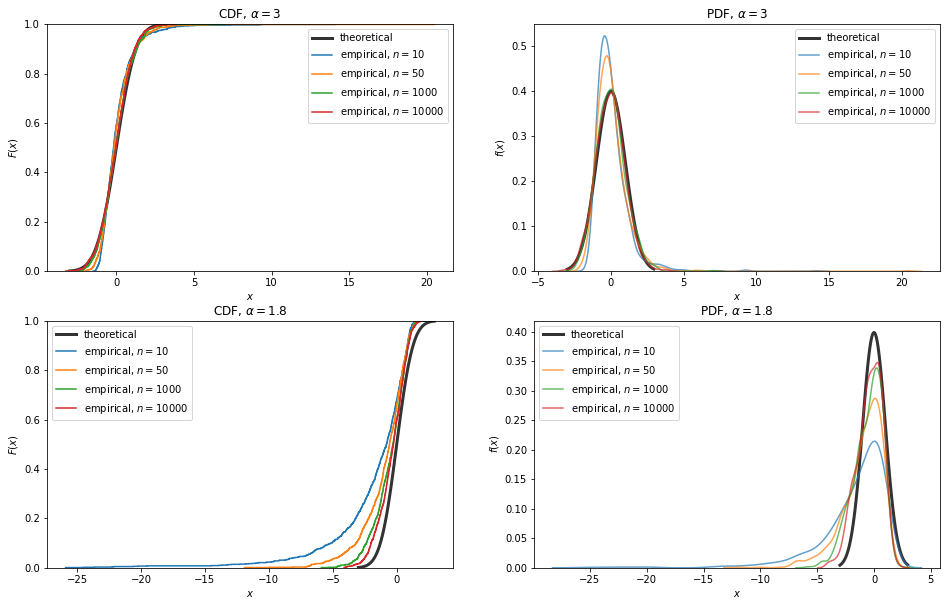

In [24]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(T, stats.norm.cdf(T),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    sb.ecdfplot(Z1[i],label=f"empirical, $n={N[i]}$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.title(f"CDF, $\\alpha={alpha[0]}$")

plt.subplot(222)
plt.plot(T, stats.norm.pdf(T),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    sb.kdeplot(Z1[i],label=f"empirical, $n={N[i]}$",alpha=0.7)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(f"PDF, $\\alpha={alpha[0]}$")

plt.subplot(223)
plt.plot(T, stats.norm.cdf(T),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    sb.ecdfplot(Z2[i],label=f"empirical, $n={N[i]}$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.title(f"CDF, $\\alpha={alpha[1]}$")

plt.subplot(224)
plt.plot(T, stats.norm.pdf(T),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    sb.kdeplot(Z2[i],label=f"empirical, $n={N[i]}$",alpha=0.7)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(f"PDF, $\\alpha={alpha[1]}$")

For case where $\alpha =3 > 2$ the $Z$ variable follows standard normal distribution, as shown on above CDF anf PDF plots. This is not longer true for $\alpha=1.8 <2$ - when variance doesn't exist, CLT no longer holds. Even with increasing $N$ the distribution is still different from $\cal{N} (0,1)$.

Text(0.5, 0.98, 'Comparison to CF for different values of $N$, ')

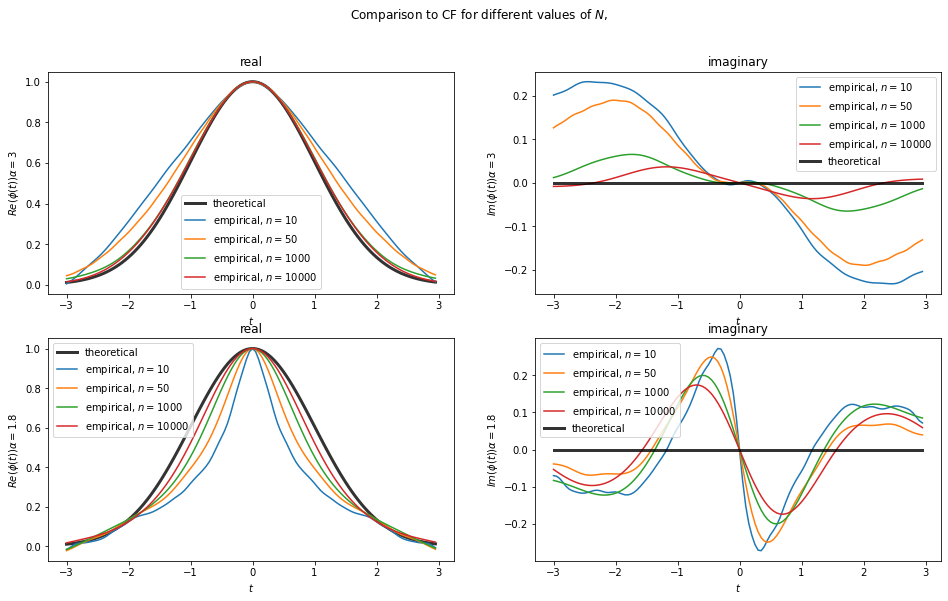

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(T, np.real(norm_cf(T)),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    plt.plot(T,np.real(ecf(Z1[i],T)),label=f"empirical, $n={N[i]}$")
plt.title("real")
plt.xlabel("$t$")
plt.ylabel("$Re(\phi(t))$" +f"$\\alpha = {alpha[0]}$")
plt.legend()

plt.subplot(222)
for i in range(len(N)):
    plt.plot(T,np.imag(ecf(Z1[i],T)),label=f"empirical, $n={N[i]}$")
plt.plot(T, np.imag(norm_cf(T)),color='black',linewidth=3,label="theoretical",alpha=0.8)
plt.title("imaginary")
plt.xlabel("$t$")
plt.ylabel("$Im(\phi(t))$" +f"$\\alpha = {alpha[0]}$")
plt.legend()
plt.subplot(223)
plt.plot(T, np.real(norm_cf(T)),color='black',linewidth=3,label="theoretical",alpha=0.8)
for i in range(len(N)):
    plt.plot(T,np.real(ecf(Z2[i],T)),label=f"empirical, $n={N[i]}$")
plt.title("real")
plt.xlabel("$t$")
plt.ylabel("$Re(\phi(t))$" +f"$\\alpha = {alpha[1]}$")
plt.legend()

plt.subplot(224)
for i in range(len(N)):
    plt.plot(T,np.imag(ecf(Z2[i],T)),label=f"empirical, $n={N[i]}$")
plt.plot(T, np.imag(norm_cf(T)),color='black',linewidth=3,label="theoretical",alpha=0.8)
plt.title("imaginary")
plt.xlabel("$t$")
plt.ylabel("$Im(\phi(t))$" +f"$\\alpha = {alpha[1]}$")
plt.legend()

plt.suptitle(r"Comparison to CF for different values of $N$, ")

Characteric function plots for $Z$ also differs from $\cal{N}(0,1)$ - it is clearly visible when comparing imaginary parts.